# Homework1
Nurtas Ilyas

#0.1  Learning Exercises

**1. Exercise 1.1**

**(a)**

X = Medical History and Symptoms

Y = Diagnosis

f = Diagnostics

**(b)**

X = Images of Digits

Y = Digits (0...9)

f = Ideal digit recognition

**(c)**

X = content of mail (for example: keywords)

Y = spam or not spam (0 or 1)

f = text processing

**(d)**

X = price, temperature and day of the week

Y = electric load value

f = ideal load value formula

**(e)**

Car detection. Detect whether there is a car in picture or not. (Might be used to identify weather the parking slot is free or not)

X = pictures of cars and not cars

Y = car or not car(1 or 0)

f = ideal car detector



**2. Exercise 1.5**

(a) Determining the age at which a particular medical test should be performed 

**Learning Approach**. 

(b) Classifying numbers into primes and non-primes
 
**Design Approach**. Because the number is prime if it is divisible by only 1 and itself (Which is easily programmable)

(c) Detecting potential fraud in credit card charges 

**Learning Approach**. Because potential fraud can be predicted by learning from previous fraud conditions. (Not easily programmable)

(d) Determining the time it would take a falling object to hit the ground

**Design Approach**. Because time can be found using physics formula.  (Which is easily programmable)

(e) Determining the optimal cycle for traffic lights in a busy intersection

**Learning Approach**. 


# 0.2 Perceptron Learning Algorithm

1. Show that $y(t)w^T(t)x(t) < 0$

Since, x(t) is misclassified: $y(t) = -sign(w^T(t)x(t))$

Then : $y(t)w^T(t)x(t) = -sign(w^T(t)x(t))w^T(t)x(t) = -1 * abs(w^T(t)x(t))$

<center>$-1 * abs(w^T(t)x(t))  <  0 \\  y(t)w^T(t)x(t)  <  0$</center>

2. Show that  $y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t)$

<center>
$w^T(t+1) = w^T(t) + y(t)x^T(t)\\$
<br>
$y(t)w^T(t+1)x(t) = y(t)w^T(t)x(t) + x^T(t)x(t)\\$
<br>
$x^T(t)x(t) > 0$, because all elements are squared
<br><br>
Therefore, $y(t)w^T(t)x(t) + x^T(t)x(t) \geq y(t)w^T(t)x(t)\\$
<br>
$y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t)$
  </center>

3. As far as classifying x(t) is concerned, argue that the move from w(t) to w(t + 1) is a move 'in the right direction'

Since, $y(t)wT(t)x(t) < 0$, if x(t) is misclassified, But if x(t) is classified correctly  $y(t)wT(t)x(t) \geq 0$


And since, $y(t)w^T(t+1)x(t) > y(t)w^T(t)x(t)$ , it implies that we are moving towards the positive direction.

Therefore, we are moving in right direction.

#0.3 Experiments with Perceptron Learning Algorithm

**(a) Generating and plotting data**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

def plot_2d_line(w, ax, label):
  xx = np.linspace(-20.0, 20.0, 100)
  yy = -(w[1] * xx + w[0]) / w[2]
  ax.plot(xx, yy, label = label)

def plot_2d_data(X, y, ax, class1 = 'Class 1', class2 = 'Class 2', marker_size = 30):
  ax.set_xlim((X[:,1].min() - 2.0, X[:,1].max() + 2.0))
  ax.set_ylim((X[:,2].min() - 2.0, X[:,2].max() + 2.0))

  ax.scatter(X[y == -1, 1], X[y == -1, 2], 
              c='blue', s = marker_size, label=class1)

  ax.scatter(X[y == 1, 1], X[y == 1, 2], 
              c='red', s = marker_size, label=class2, marker='s')

**(b) Running PLA**

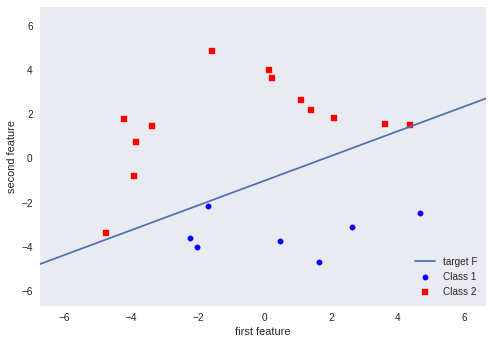

In [160]:
def gen_rand_data(size = 20, marker_size = 30):
  fig,ax = plt.subplots()
  w = (np.random.rand(3) - 0.5)

  plot_2d_line(w, ax, "target F")

  X = 10 * (np.random.rand(size, 2) -0.5)
  y = np.zeros(size)
  n_features = np.shape(X)[0]
  X = np.concatenate((np.ones((n_features, 1)), X), axis = 1)

  for i, x in enumerate(X):
    if(np.dot(w,x) >= 0):
      y[i] = 1
    else:
      y[i] = -1
  

  plot_2d_data(X, y, ax, marker_size = marker_size)

  plt.xlabel('first feature')
  plt.ylabel('second feature')
  plt.legend(loc='lower right');

  plt.grid()

  plt.show()
  
  return w, X, y



f, X, y = gen_rand_data()


Number of total updates before converging:  82


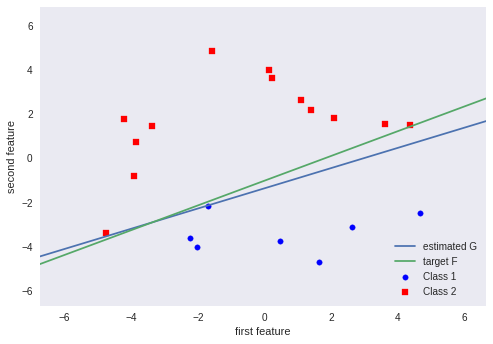

In [161]:
def pla_rand_data(f, X, y, marker_size = 30):
  t = 0
  is_updated = True
  g = np.zeros(3)
  while is_updated:
    is_updated = False
    for i, xt in enumerate(X):
      if((y[i] > 0)!= (np.dot(g, xt) > 0)):
        g = g + y[i]*xt
        t+=1
        is_updated = True
        break


  print("Number of total updates before converging: ", t)

  fig,ax = plt.subplots()

  plot_2d_line(g, ax, "estimated G")

  plot_2d_line(f, ax, "target F")

  plot_2d_data(X, y, ax, marker_size = marker_size)

  plt.xlabel('first feature')
  plt.ylabel('second feature')
  plt.legend(loc='lower right');

  plt.grid()

  plt.show()

pla_rand_data(f, X, y)

Target g is close  to f (depends on data and f), and, both functions seperate the linear separable data

(c) Another dataset of size 20

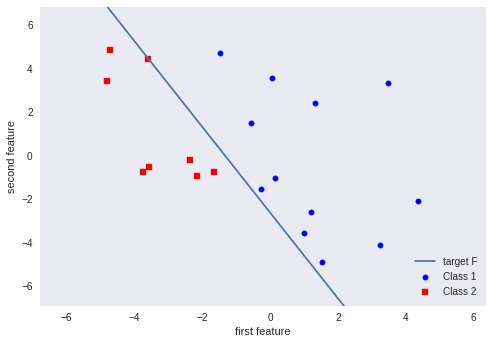

In [162]:
f, X, y = gen_rand_data()

Number of total updates before converging:  17


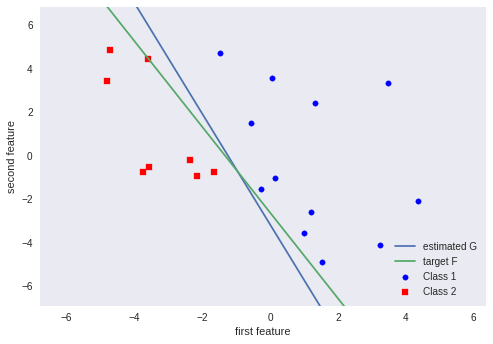

In [163]:
pla_rand_data(f, X, y)

Second time funcitons converged faster (but it depends on luck). f and g are close to each other

**(d) Another dataset of size 100**

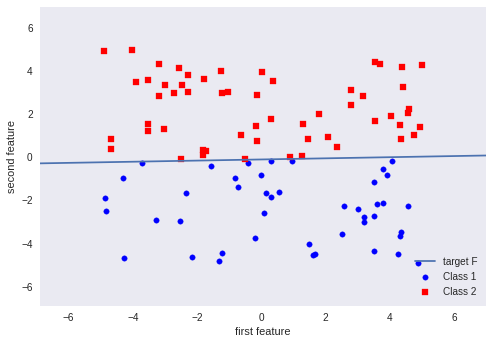

In [164]:
f, X, y = gen_rand_data(size = 100)

Number of total updates before converging:  56


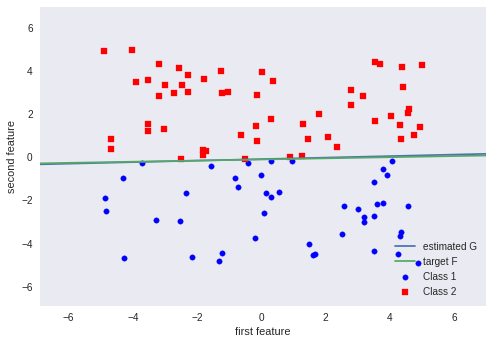

In [165]:
pla_rand_data(f, X, y)

With size = 100, functions converged little bit slower , and g is closer to f

**(e) Another dataset with size 1000**

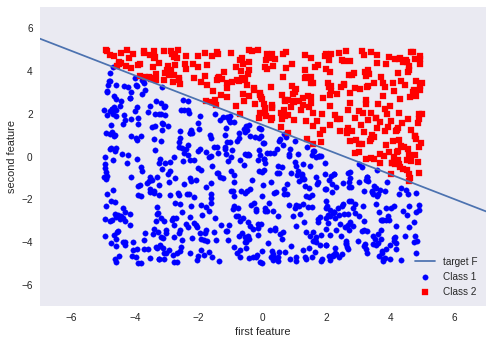

In [166]:
f, X, y = gen_rand_data(size = 1000)

Number of total updates before converging:  109


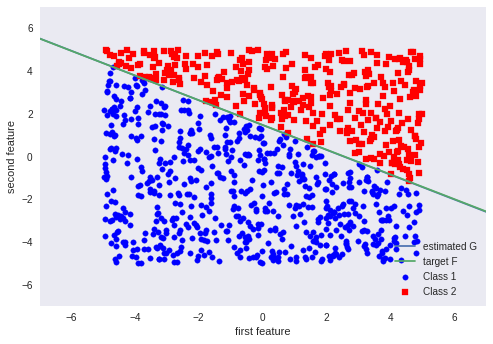

In [167]:
pla_rand_data(f, X, y)

Functions converged slower, and f is similar to g

#Pocket Algorithm

**(a) Generating Data**

In [0]:
import random

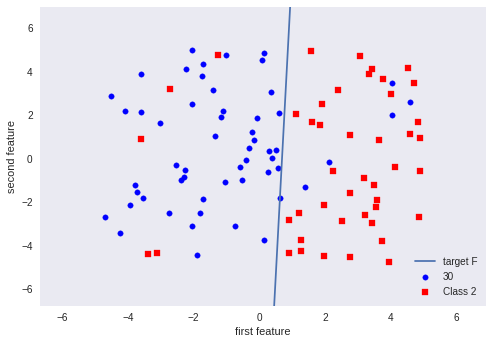

In [128]:
def gen_pocket_data(w = None, size = 100, marker_size = 30):
  fig,ax = plt.subplots()
  if w is None:
    w = (np.random.rand(3) - 0.5)
  
  plot_2d_line(w, ax, "target F")

  X = 10 *(np.random.rand(size, 2) - 0.5)
  y = np.zeros(size)
  n_features = np.shape(X)[0]
  X = np.concatenate((np.ones((n_features, 1)), X), axis = 1)
  
  flip = []
  for i in range(0, size // 10):
    flip.append(random.randint(0, size))
    
  for i, x in enumerate(X):
    if(np.dot(w,x) >= 0):
      y[i] = 1
    else:
      y[i] = -1
    if i in flip:
      y[i] = -y[i]
    


  plot_2d_data(X, y, ax, marker_size)

  plt.xlabel('first feature')
  plt.ylabel('second feature')
  plt.legend(loc='lower right');

  plt.grid()

  plt.show()
  
  return w, X, y

f, X_train, y_train = gen_pocket_data()

**Generating test set of size 1000**

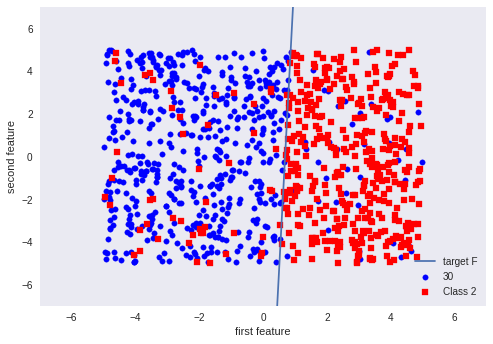

In [129]:
f, X_test, y_test = gen_pocket_data(f,size = 1000)

Running Pocket PLA

In [0]:
def error_calc(X, y, gt):
  n_correct = 0
  for i, xt in enumerate(X):
      n_correct += ((y[i] > 0) == (np.dot(gt, xt) > 0))
  return np.shape(X)[0] - n_correct

**This Code (the code below) might take a while**

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Average error plot of in sample data (train data):


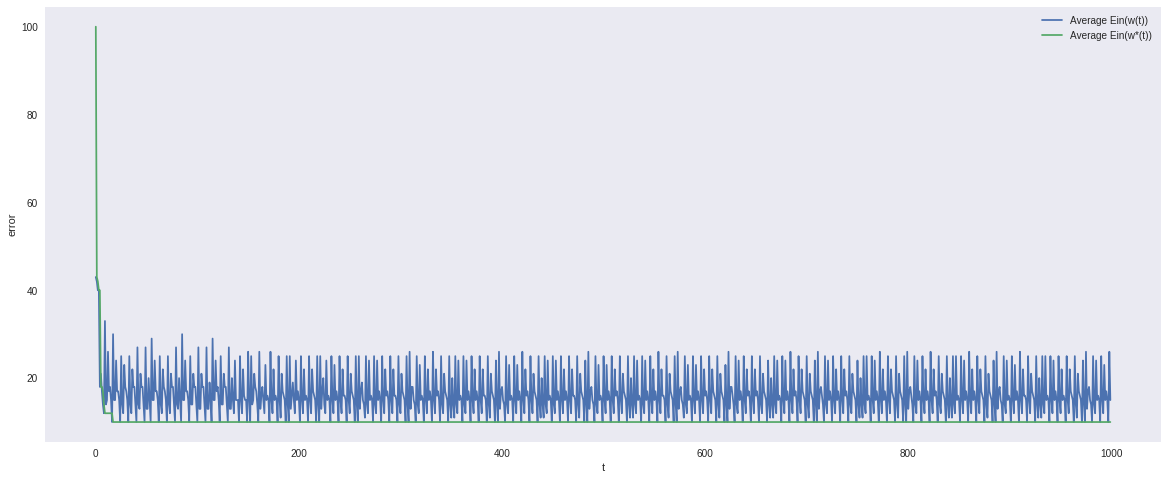

Average error plot of out sample data (test data):


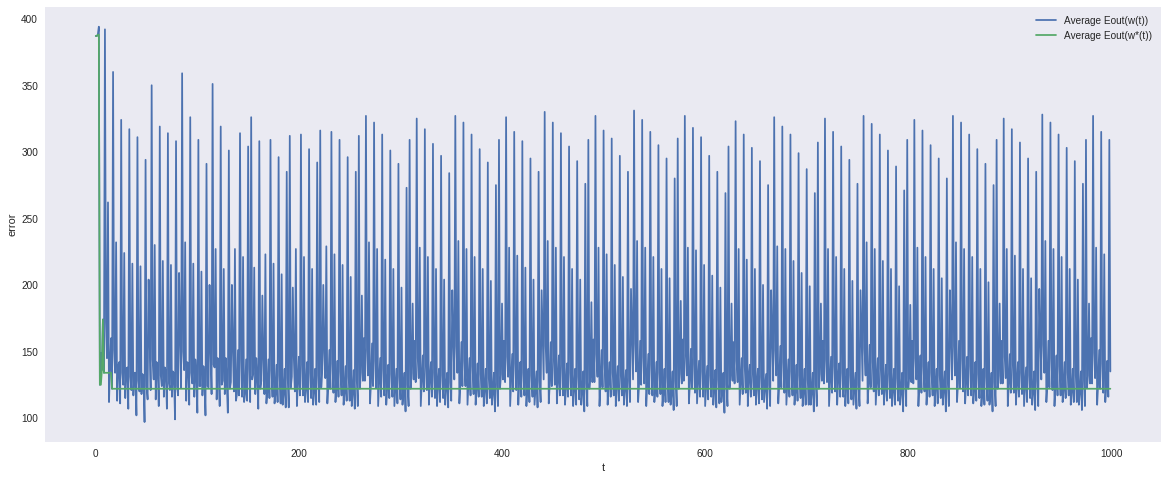

In [159]:
def pocket_pla_data(f, X, y, X_test = None, y_test = None, iterations = 1000):
  
  min_error = np.shape(X)[0]
  if X_test is not None:
    test_min_error = np.shape(X_test)[0]
  
  E_t = np.zeros((iterations, 1))
  E_min = np.zeros((iterations, 1))
  E_out = np.zeros((iterations, 1))
  E_min_out = np.zeros((iterations, 1))
  
  g = None
  n_iter = 0
  gt = np.zeros(3)
  
  while True:
    n_correct = 0
    #update
    for i, xt in enumerate(X):
      if((y[i] > 0)!= (np.dot(gt, xt) > 0)):
        gt = gt + y[i]*xt
        break
    
    error = error_calc(X, y, gt)
    E_t[n_iter][0] = error
    E_min[n_iter][0] = min_error
    
    if min_error > error:
      min_error = error
      g = gt
    
    
    if X_test is not None:
      E_out[n_iter][0] = error_calc(X_test, y_test, gt)
      E_min_out[n_iter][0] = error_calc(X_test, y_test, g)
    
    n_iter += 1
    if n_iter == iterations:
      break

#   fig,ax = plt.subplots()

#   plot_2d_line(g, ax, "estimated G")

#   plot_2d_line(f, ax, "target F")

#   plot_2d_data(X, y, ax, marker_size = marker_size)

#   plt.xlabel('first feature')
#   plt.ylabel('second feature')
#   plt.legend(loc='lower right');

#   plt.grid()

#   plt.show()
  
  return g, E_t, E_min, E_out, E_min_out 


g, E_t, E_min, E_out, E_min_out = pocket_pla_data(f, X_train, y_train, X_test, y_test)


for i in range(1, 21): 
  g_i, e_t, e_min, e_out, e_min_out = pocket_pla_data(f, X_train, y_train, X_test, y_test)
  print(i)
  E_t = np.concatenate((E_t, e_t), axis = 1)
  E_min = np.concatenate((E_min, e_min), axis = 1)
  E_out = np.concatenate((E_out, e_out), axis = 1)
  E_min_out = np.concatenate((E_min_out, e_min_out), axis = 1)

#Recorded errors stored in E_t = Ein(w(t)), E_min = Ein(w*(t)), E_out = Eout(w(t)), E_min_out = Eout(w*(t))


Et_avg = np.average(E_t, axis = 1)
Emin_avg = np.average(E_min, axis = 1)

xx = np.array(range(0, 1000))

print("Average error plot of in sample data (train data):")

fig, ax = plt.subplots()
fig.set_size_inches(20, 8, forward=True)

ax.plot(xx, Et_avg, label = "Average Ein(w(t))")
ax.plot(xx, Emin_avg, label = "Average Ein(w*(t))")

plt.xlabel('t')
plt.ylabel('error')

plt.legend(loc='upper right');

plt.grid()

plt.show()


print("Average error plot of out sample data (test data):")

Eout_avg = np.average(E_out, axis = 1)
Emout_avg = np.average(E_min_out, axis = 1)

fig, ax = plt.subplots()
fig.set_size_inches(20, 8, forward=True)

ax.plot(xx, Eout_avg, label = "Average Eout(w(t))")
ax.plot(xx, Emout_avg, label = "Average Eout(w*(t))")

plt.xlabel('t')
plt.ylabel('error')

plt.legend(loc='upper right');

plt.grid()


plt.show()


The Ein(w*(t)) and Eout(w*(t)) are stabilized, and were minimized, after 20 or 30 iterations. While Ein(w(t)) and Eout(w(t)) continued fluctuating.

This is because Ein(w*(t)) will be the minimum of Ein(w(t)) after first finding of that minimum.

While Eout(w(t)) is smaller than Eout(w*(t)) in some iterations. This is because the data was not traned on out sample data.